In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [15]:
df = pd.read_csv("E:\Important\Skills\Data-Analysis-With-Python\Global Coffee Health Data Aanalysis\synthetic_coffee_health_10000.csv")

In [16]:
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [17]:
df.shape

(10000, 16)

In [18]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
Age,10000.0,NaN,NaN,NaN,34.9491,11.160939,18.0,26.0,34.0,43.0,80.0
Gender,10000,3,Female,5001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,10000,20,Canada,543,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Coffee_Intake,10000.0,NaN,NaN,NaN,2.50923,1.450248,0.0,1.5,2.5,3.5,8.2
Caffeine_mg,10000.0,NaN,NaN,NaN,238.41101,137.748815,0.0,138.75,235.4,332.025,780.3
Sleep_Hours,10000.0,NaN,NaN,NaN,6.63622,1.222055,3.0,5.8,6.6,7.5,10.0
Sleep_Quality,10000,4,Good,5637,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BMI,10000.0,NaN,NaN,NaN,23.98686,3.906411,15.0,21.3,24.0,26.6,38.2
Heart_Rate,10000.0,NaN,NaN,NaN,70.6178,9.822951,50.0,64.0,71.0,77.0,109.0


In [19]:
df.isnull().sum()

ID                            0
Age                           0
Gender                        0
Country                       0
Coffee_Intake                 0
Caffeine_mg                   0
Sleep_Hours                   0
Sleep_Quality                 0
BMI                           0
Heart_Rate                    0
Stress_Level                  0
Physical_Activity_Hours       0
Health_Issues              5941
Occupation                    0
Smoking                       0
Alcohol_Consumption           0
dtype: int64

In [20]:
mode_val = df["Health_Issues"].mode()[0]

In [21]:
mode_val

'Mild'

In [22]:
df["Health_Issues"] = df["Health_Issues"].fillna(mode_val)

In [23]:
df.isnull().sum()

ID                         0
Age                        0
Gender                     0
Country                    0
Coffee_Intake              0
Caffeine_mg                0
Sleep_Hours                0
Sleep_Quality              0
BMI                        0
Heart_Rate                 0
Stress_Level               0
Physical_Activity_Hours    0
Health_Issues              0
Occupation                 0
Smoking                    0
Alcohol_Consumption        0
dtype: int64

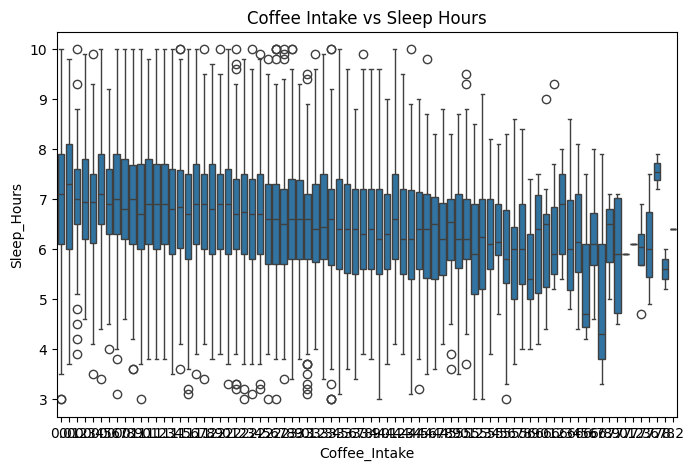

In [24]:
# Coffee Intake vs. Sleep Hours
plt.figure(figsize=(8,5))
sns.boxplot(x="Coffee_Intake", y="Sleep_Hours", data=df)
plt.title("Coffee Intake vs Sleep Hours")
plt.show()

In [25]:
# Statistical test (ANOVA)
anova = stats.f_oneway(
    *[df[df["Coffee_Intake"] == i]["Sleep_Hours"].dropna() for i in df["Coffee_Intake"].unique()]
)
print("ANOVA (Coffee_Intake → Sleep_Hours):", anova)

ANOVA (Coffee_Intake → Sleep_Hours): F_onewayResult(statistic=5.598278288960596, pvalue=2.5336338835456323e-49)


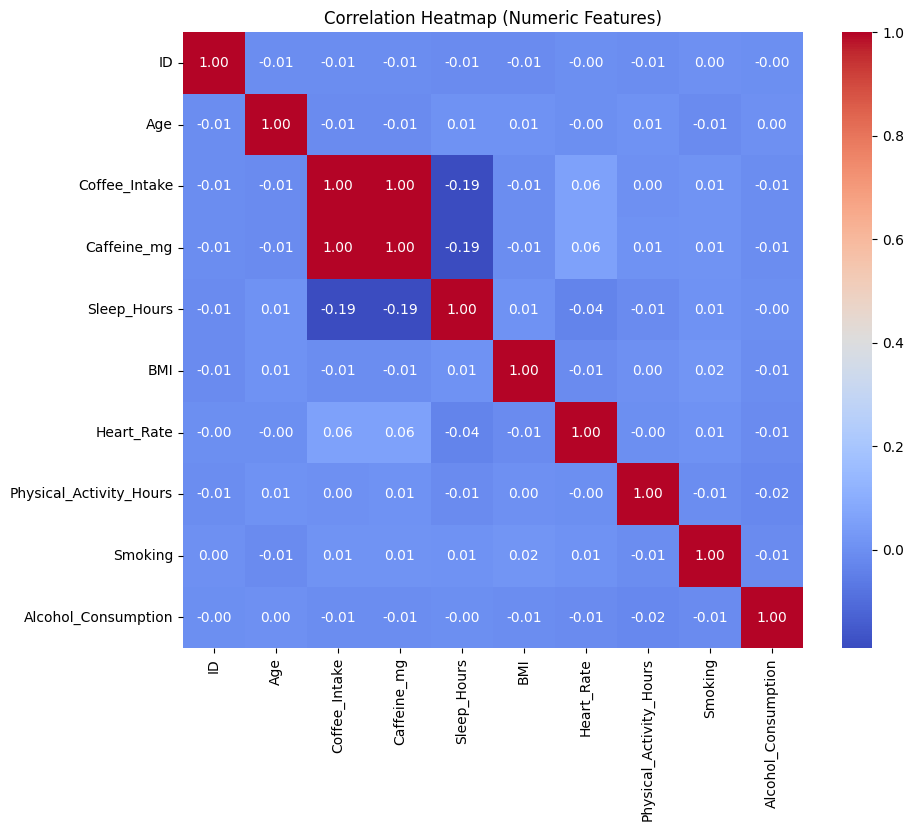

Sleep_Hours                1.000000
BMI                        0.008463
Smoking                    0.007955
Age                        0.005010
Alcohol_Consumption       -0.003375
ID                        -0.010274
Physical_Activity_Hours   -0.011228
Heart_Rate                -0.036219
Coffee_Intake             -0.190291
Caffeine_mg               -0.190493
Name: Sleep_Hours, dtype: float64


In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

print(df.corr(numeric_only=True)["Sleep_Hours"].sort_values(ascending=False))

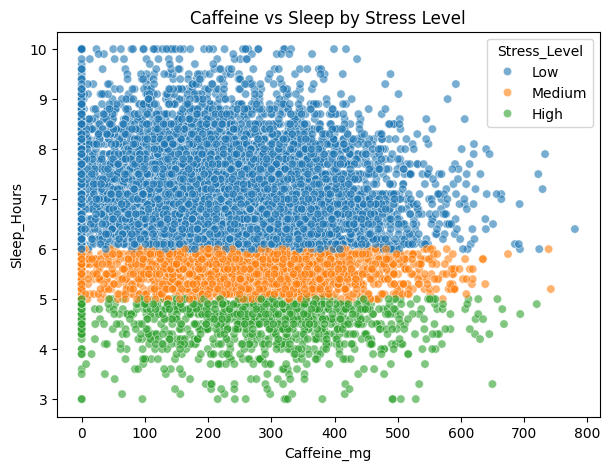

In [27]:
# Scatterplot: Caffeine vs. Sleep
plt.figure(figsize=(7,5))
sns.scatterplot(x="Caffeine_mg", y="Sleep_Hours", hue="Stress_Level", data=df, alpha=0.6)
plt.title("Caffeine vs Sleep by Stress Level")
plt.show()

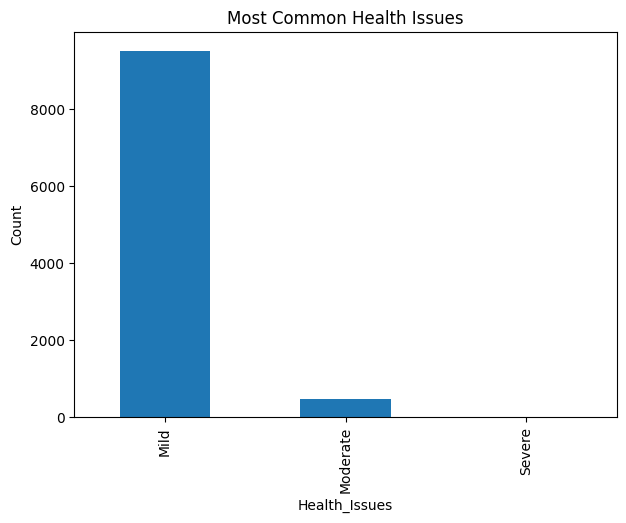

In [28]:
# Distribution of Health Issues
plt.figure(figsize=(7,5))
df["Health_Issues"].value_counts().head(10).plot(kind="bar")
plt.title("Most Common Health Issues")
plt.ylabel("Count")
plt.show()